In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import joblib

## Import Dataset and Prepare for Split

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
drop_cols = ['person_gender', 'person_education']
df = df.drop(drop_cols,axis = 1)
df

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
# Replacing Values of Previous Loan Defaults column values Yes with 1 and No with 0
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'Yes':1,'No': 0})
df

C:\Users\kidus\AppData\Local\Temp\ipykernel_3892\754555983.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'Yes':1,'No': 0})


,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,0,1
44996,37.0,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,0,1
44997,33.0,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,0,1
44998,29.0,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,0,1


### Extracting Features and Target

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Data Preprocessing 

#### Encode Categorical Columns 

In [10]:
cat_cols = [3,5]
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), cat_cols)], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [11]:
x

array([[0.0, 0.0, 0.0, ..., 3.0, 561, 0],
       [0.0, 0.0, 1.0, ..., 2.0, 504, 1],
       [1.0, 0.0, 0.0, ..., 3.0, 635, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 10.0, 668, 0],
       [0.0, 0.0, 0.0, ..., 6.0, 604, 0],
       [0.0, 0.0, 0.0, ..., 3.0, 628, 0]], dtype=object)

### Splitting the DataSet into Training Set and Test Set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Feature Scaling

In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Build, Train and Evaluate the Models 

Logistic Regression Accuracy: 0.8937
Random Forest Accuracy: 0.9274
Support Vector Machine Accuracy: 0.9151


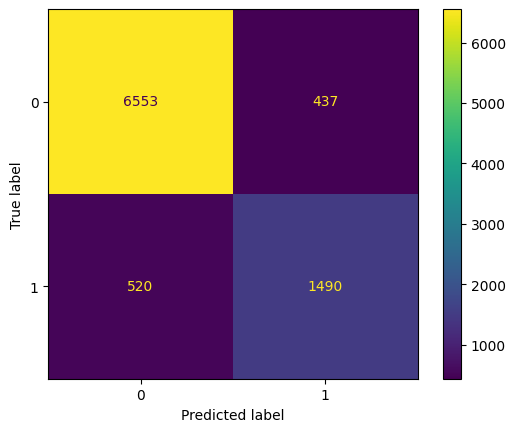

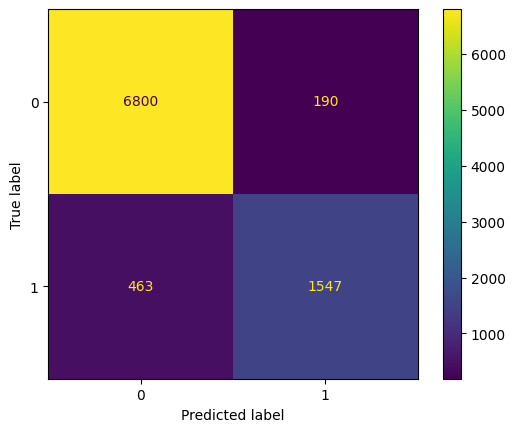

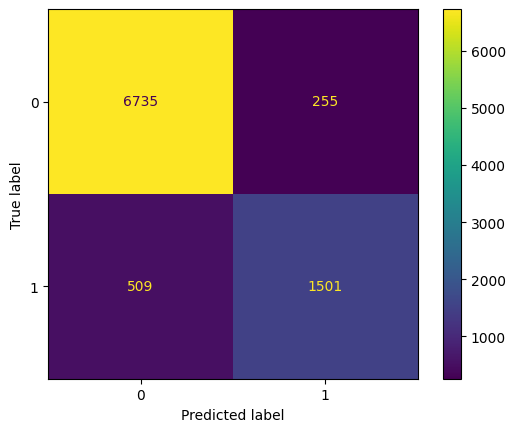

In [41]:
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Random Forest': RandomForestClassifier(n_estimators = 20),
    'Support Vector Machine': SVC(kernel ='rbf')
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('classifier', model)
    ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [46]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, f'{best_model_name}_pipeline.pkl')
print(f"\nSaved the best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Saved the best model: Random Forest with accuracy 0.9274
